# Activation Functions: Focus on ReLU

This lesson explores activation functions with a special focus on the ReLU (Rectified Linear Unit) function.


## What are Activation Functions?

**Activation functions** determine the output of a neural network node given an input or set of inputs. They introduce non-linearity into neural networks, allowing them to learn complex patterns.

In a neural network, the activation function is applied to the weighted sum of inputs plus bias:

$$output = f(\sum_{i=1}^{n} w_i x_i + b)$$

Where:

- $f$ is the activation function
- $w_i$ are the weights
- $x_i$ are the inputs
- $b$ is the bias


## ReLU: Rectified Linear Unit

The **Rectified Linear Unit (ReLU)** is one of the most widely used activation functions in deep learning today.

### Definition of ReLU

ReLU is defined mathematically as:

$$f(x) = \max(0, x)$$

In simpler terms:
$$f(x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$$

ReLU outputs the input directly if it is positive, otherwise, it outputs zero.


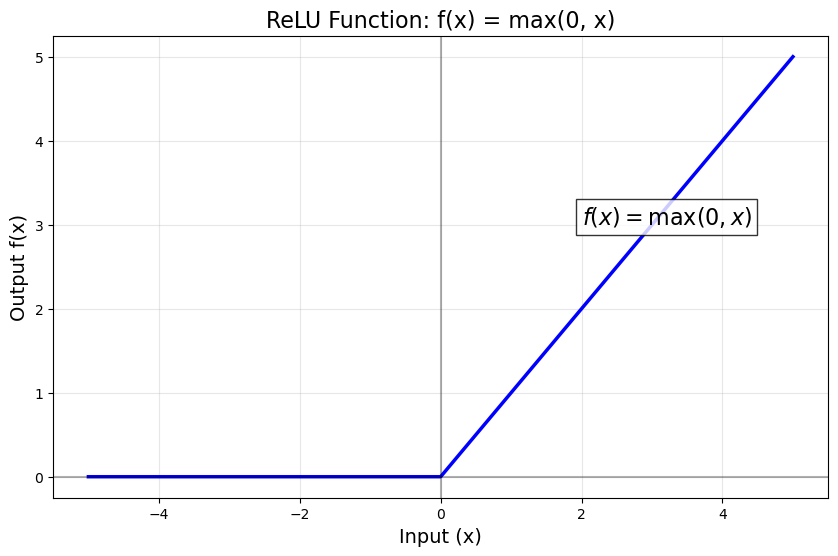

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data points
x = np.linspace(-5, 5, 1000)
relu = np.maximum(0, x)

# Plot ReLU function
plt.figure(figsize=(10, 6))
plt.plot(x, relu, "b-", linewidth=2.5)
plt.title("ReLU Function: f(x) = max(0, x)", fontsize=16)
plt.xlabel("Input (x)", fontsize=14)
plt.ylabel("Output f(x)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linestyle="-", alpha=0.3)
plt.axvline(x=0, color="k", linestyle="-", alpha=0.3)

# Add the equation
plt.text(2, 3, r"$f(x) = \max(0, x)$", fontsize=16, bbox=dict(facecolor="white", alpha=0.8))
plt.show()

## Advantages of ReLU

1. **Computational efficiency**: Simple to compute (just a max operation)
2. **Sparsity**: Produces true zero values, creating sparse activations
3. **Reduced vanishing gradient problem**: Gradient is 1 for all positive values
4. **Faster convergence**: Accelerates training compared to sigmoid/tanh

## Limitations of ReLU

1. **Dying ReLU problem**: Neurons can "die" during training if they consistently receive negative inputs
2. **Not zero-centered**: Mean activations are always positive
3. **Unbounded output**: Can lead to exploding gradients


## Three Examples of ReLU in Action


In [ ]:
# Example 1: Basic ReLU implementation
import numpy as np


def relu(x):
    """Simple ReLU function implementation"""
    return np.maximum(0, x)


# Test with various inputs
test_inputs = [-5, -2, 0, 1, 3, 7]
outputs = [relu(x) for x in test_inputs]

print("Example 1: Basic ReLU Operation")
print("-" * 30)
print("Input  | Output")
print("-" * 15)
for x, y in zip(test_inputs, outputs):
    print(f"{x:6} | {y}")

Example 1: Basic ReLU Operation
------------------------------
Input  | Output
---------------
    -5 | 0
    -2 | 0
     0 | 0
     1 | 1
     3 | 3
     7 | 7


In [ ]:
# Example 2: ReLU in a single neuron
def neuron_with_relu(inputs, weights, bias):
    """Simulate a single neuron with ReLU activation"""
    # Calculate weighted sum
    weighted_sum = sum(w * x for w, x in zip(weights, inputs)) + bias
    # Apply ReLU activation
    activation = relu(weighted_sum)
    return weighted_sum, activation


# Test cases
test_cases = [
    {"inputs": [0.5, -1.0, 0.8], "weights": [0.2, 0.5, -0.1], "bias": 0.0},  # Slightly positive
    {"inputs": [0.5, -1.0, 0.8], "weights": [-0.2, 0.5, -0.1], "bias": -0.5},  # Negative
    {"inputs": [2.0, 3.0, -0.5], "weights": [0.5, 0.2, 0.1], "bias": 0.5},  # Strongly positive
]

print("\nExample 2: ReLU in a Single Neuron")
print("-" * 50)
for i, case in enumerate(test_cases):
    weighted_sum, activation = neuron_with_relu(case["inputs"], case["weights"], case["bias"])
    print(f"Case {i+1}:")
    print(f"  Inputs: {case['inputs']}")
    print(f"  Weights: {case['weights']}")
    print(f"  Bias: {case['bias']}")
    print(f"  Weighted sum: {weighted_sum:.4f}")
    print(f"  ReLU activation: {activation:.4f}")
    print()


Example 2: ReLU in a Single Neuron
--------------------------------------------------
Case 1:
  Inputs: [0.5, -1.0, 0.8]
  Weights: [0.2, 0.5, -0.1]
  Bias: 0.0
  Weighted sum: -0.4800
  ReLU activation: 0.0000

Case 2:
  Inputs: [0.5, -1.0, 0.8]
  Weights: [-0.2, 0.5, -0.1]
  Bias: -0.5
  Weighted sum: -1.1800
  ReLU activation: 0.0000

Case 3:
  Inputs: [2.0, 3.0, -0.5]
  Weights: [0.5, 0.2, 0.1]
  Bias: 0.5
  Weighted sum: 2.0500
  ReLU activation: 2.0500



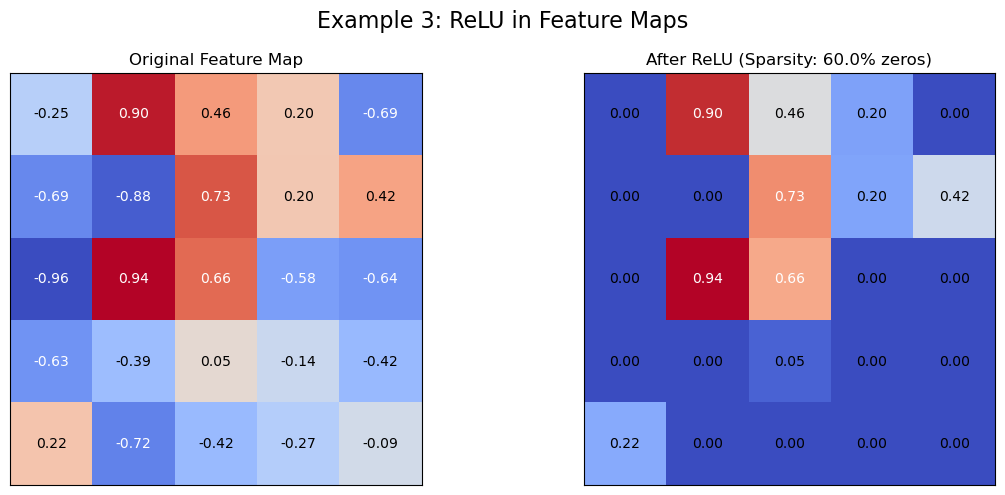

ReLU created sparsity by converting all negative values to zero.
This sparsity (60.0%) can make neural networks more efficient.


In [ ]:
# Example 3: ReLU in feature maps (visual example)
import matplotlib.pyplot as plt

# Create a simple 5x5 feature map (could be from a CNN layer)
np.random.seed(42)
feature_map = np.random.uniform(-1, 1, (5, 5))

# Apply ReLU
relu_feature_map = relu(feature_map)

# Calculate sparsity (percentage of zeros)
sparsity = np.sum(relu_feature_map == 0) / relu_feature_map.size * 100

# Visualize the feature maps
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original feature map
axs[0].imshow(feature_map, cmap="coolwarm")
axs[0].set_title("Original Feature Map")
axs[0].set_xticks([])
axs[0].set_yticks([])
for i in range(5):
    for j in range(5):
        axs[0].text(
            j,
            i,
            f"{feature_map[i, j]:.2f}",
            ha="center",
            va="center",
            color="white" if abs(feature_map[i, j]) > 0.5 else "black",
        )

# After ReLU
axs[1].imshow(relu_feature_map, cmap="coolwarm")
axs[1].set_title(f"After ReLU (Sparsity: {sparsity:.1f}% zeros)")
axs[1].set_xticks([])
axs[1].set_yticks([])
for i in range(5):
    for j in range(5):
        axs[1].text(
            j,
            i,
            f"{relu_feature_map[i, j]:.2f}",
            ha="center",
            va="center",
            color="white" if relu_feature_map[i, j] > 0.5 else "black",
        )

plt.suptitle("Example 3: ReLU in Feature Maps", fontsize=16)
plt.tight_layout()
plt.show()

print(f"ReLU created sparsity by converting all negative values to zero.")
print(f"This sparsity ({sparsity:.1f}%) can make neural networks more efficient.")

## ReLU Variants

Several variants of ReLU have been developed to address its limitations:

1. **Leaky ReLU**: $f(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha x & \text{if } x \leq 0 \end{cases}$ where $\alpha$ is a small constant (typically 0.01).
2. **Parametric ReLU (PReLU)**: Similar to Leaky ReLU, but the $\alpha$ parameter is learned during training.
3. **ELU (Exponential Linear Unit)**: $f(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha (e^x - 1) & \text{if } x \leq 0 \end{cases}$


## Key Takeaways

- **ReLU** is defined as $f(x) = \max(0, x)$, outputting the input for positive values and zero otherwise.
- ReLU introduces **non-linearity** into neural networks while being computationally efficient.
- It helps solve the **vanishing gradient problem** for deep networks.
- ReLU creates **sparse activations**, which can improve model efficiency.
- Its main limitation is the **dying ReLU problem**, where neurons can permanently deactivate.
- Several **variants** like Leaky ReLU address some of these limitations.
